In [5]:
library("tidyverse")

── Attaching core tidyverse packages ──────── tidyverse 2.0.0 ──
✔ forcats   1.0.1     ✔ readr     2.1.5
✔ lubridate 1.9.4     ✔ stringr   1.6.0
✔ purrr     1.2.0     ✔ tibble    3.3.0
── Conflicts ────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the ]8;;http://conflicted.r-lib.org/conflicted package]8;; to force all conflicts to become errors


# Intro

Tidyverse will make your code consistent, readable, and efficient.

Tidy data explained:

1. Unifined design philosophy (using tibble instead of df)
    - Each column is a variable
    - Each row is an observation
    - Each cell is a single value

2. Consistent syntax
    - Functions have easy to read syntax

3. Functions work seamlessly together

In [ ]:
# Show the starwars dataset from tidyverse, return the head of the tibble
starwars
# Notice the variable types

# A tibble: 87 × 14
   name         height  mass hair_color skin_color eye_color birth_year sex   gender
   <chr>         <int> <dbl> <chr>      <chr>      <chr>          <dbl> <chr> <chr> 
 1 Luke Skywal…    172    77 blond      fair       blue            19   male  mascu…
 2 C-3PO           167    75 NA         gold       yellow         112   none  mascu…
 3 R2-D2            96    32 NA         white, bl… red             33   none  mascu…
 4 Darth Vader     202   136 none       white      yellow          41.9 male  mascu…
 5 Leia Organa     150    49 brown      light      brown           19   fema… femin…
 6 Owen Lars       178   120 brown, gr… light      blue            52   male  mascu…
 7 Beru Whites…    165    75 brown      light      blue            47   fema… femin…
 8 R5-D4            97    32 NA         white, red red             NA   none  mascu…
 9 Biggs Darkl…    183    84 black      light      brown           24   male  mascu…
10 Obi-Wan Ken…    182    77 auburn, w… fair 

In [18]:
# Turn dataframe into tibble
df <- data.frame()
dt <- as_tibble(df)
dt

# A tibble: 0 × 0

# Manipulating data with `dplyr`

Useful functions:

```R
filter()  # filter by a certain column's row values
select()
mutate()  # create a new column with a value based on other values
summarize()
arrange()  # sort rows by column
group_by()  # create group by variable for summarizing
```

Pipe operator: `%>%`

In [11]:
# Pipe operator example
starwars %>%
  filter(species == "Human") %>%
  select(name, height, mass)

# A tibble: 35 × 3
   name               height  mass
   <chr>               <int> <dbl>
 1 Luke Skywalker        172    77
 2 Darth Vader           202   136
 3 Leia Organa           150    49
 4 Owen Lars             178   120
 5 Beru Whitesun Lars    165    75
 6 Biggs Darklighter     183    84
 7 Obi-Wan Kenobi        182    77
 8 Anakin Skywalker      188    84
 9 Wilhuff Tarkin        180    NA
10 Han Solo              180    80
# ℹ 25 more rows
# ℹ Use `print(n = ...)` to see more rows

In [ ]:
starwars %>%
  filter(!is.na(height)) %>%  # Remove NAs in the height column
  group_by(species) %>%  # Group data by species
  summarize(mean_height = mean(height), n=n()) %>%  # Get the mean by each group and the number of observations used to get those means 
  arrange(desc(mean_height))  # Sort tallest to shortest species

# A tibble: 38 × 3
   species  mean_height     n
   <chr>          <dbl> <int>
 1 Quermian        264      1
 2 Wookiee         231      2
 3 Kaminoan        221      2
 4 Kaleesh         216      1
 5 Gungan          209.     3
 6 Pau'an          206      1
 7 Besalisk        198      1
 8 Cerean          198      1
 9 Chagrian        196      1
10 Nautolan        196      1
# ℹ 28 more rows
# ℹ Use `print(n = ...)` to see more rows

# Reshaping data with `tidyr`

Turning data from "wide" to "long". Use `pivot_longer()` to create a tibble with only 3 columns: `id`, `key` and `val`. It's sort of like a `group_by()` on the index.

In [29]:
sw <- starwars %>%
  select(name, height, mass, birth_year) %>%
  filter(!is.na(height) & !is.na(mass))

print(sw)

sw %>%
  pivot_longer(cols=height:birth_year, names_to="measurement", values_to="value")

# A tibble: 59 × 4
   name               height  mass birth_year
   <chr>               <int> <dbl>      <dbl>
 1 Luke Skywalker        172    77       19  
 2 C-3PO                 167    75      112  
 3 R2-D2                  96    32       33  
 4 Darth Vader           202   136       41.9
 5 Leia Organa           150    49       19  
 6 Owen Lars             178   120       52  
 7 Beru Whitesun Lars    165    75       47  
 8 R5-D4                  97    32       NA  
 9 Biggs Darklighter     183    84       24  
10 Obi-Wan Kenobi        182    77       57  
# ℹ 49 more rows
# ℹ Use `print(n = ...)` to see more rows


# A tibble: 177 × 3
   name           measurement value
   <chr>          <chr>       <dbl>
 1 Luke Skywalker height        172
 2 Luke Skywalker mass           77
 3 Luke Skywalker birth_year     19
 4 C-3PO          height        167
 5 C-3PO          mass           75
 6 C-3PO          birth_year    112
 7 R2-D2          height         96
 8 R2-D2          mass           32
 9 R2-D2          birth_year     33
10 Darth Vader    height        202
# ℹ 167 more rows
# ℹ Use `print(n = ...)` to see more rows

# Visualizing with `ggplot2`

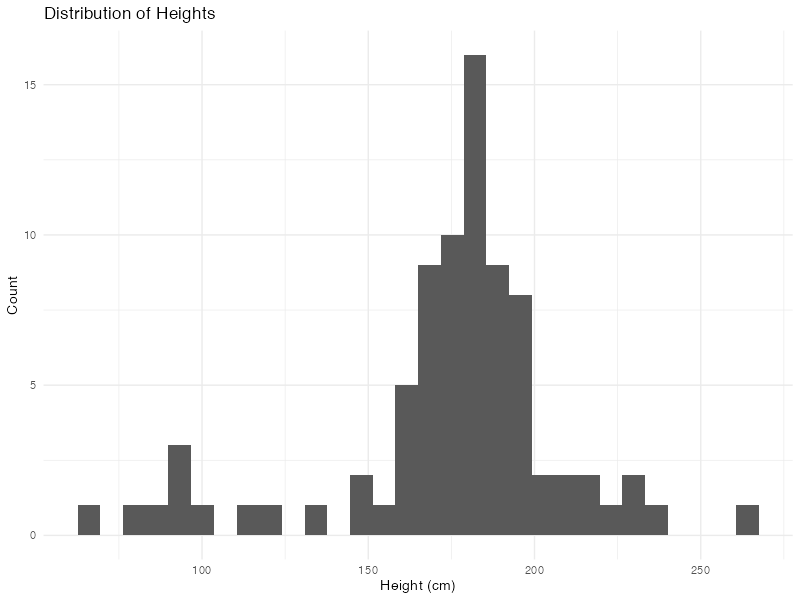

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.

In [ ]:
starwars %>%
  select(height) %>%  # Get variable you want to work with
  drop_na() %>%  # Drop NAs
  ggplot(aes(x=height)) +  # Plot the manipulated data without creating a new tibble in memory
  geom_histogram() +
  labs(title="Distribution of Heights", x="Height (cm)", y="Count") +
  theme_minimal()